# Assignment 2 - Leonardo Stoppani

## Analysis

In [1]:
# import the dataset 
import pandas as pd

df = pd.read_csv(r'./energydata_complete.csv')
print(df['T1'])


0        19.890000
1        19.890000
2        19.890000
3        19.890000
4        19.890000
           ...    
19730    25.566667
19731    25.500000
19732    25.500000
19733    25.500000
19734    25.500000
Name: T1, Length: 19735, dtype: float64


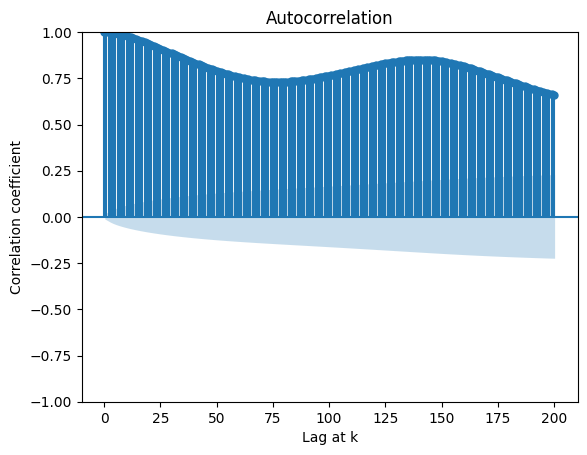

In [13]:
# autocorrelation plot 
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import numpy as np

fig = tsaplots.plot_acf(df['T1'].to_numpy(), lags = 200)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")

plt.show()